## Author: Sridharan Chandran

# PROJECT : RECOMMENDATION SYSTEM

**• DOMAIN:** Smartphone, Electronics

**• CONTEXT:** India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

**• DATA DESCRIPTION:**

**• author :** name of the person who gave the rating

**• country :** country the person who gave the rating belongs to

**• data :** date of the rating

**• domain:** website from which the rating was taken from

**• extract:** rating content

**• language:** language in which the rating was given

**• product:** name of the product/mobile phone for which the rating was given

**• score:** average rating for the phone

**• score_max:** highest rating given for the phone

**• source:** source from where the rating was taken

**• PROJECT OBJECTIVE:** We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

### 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. 

In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read all datasets
ph1 = pd.read_csv("phone_user_review_file_1.csv",encoding = "ISO-8859-1")
ph2 = pd.read_csv("phone_user_review_file_2.csv",encoding = "ISO-8859-1")
ph3 = pd.read_csv("phone_user_review_file_3.csv",encoding = "ISO-8859-1")
ph4 = pd.read_csv("phone_user_review_file_4.csv",encoding = "ISO-8859-1")
ph5 = pd.read_csv("phone_user_review_file_5.csv",encoding = "ISO-8859-1")
ph6 = pd.read_csv("phone_user_review_file_6.csv",encoding = "ISO-8859-1")

In [3]:
ph1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
ph2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
ph3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [6]:
ph4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [7]:
ph5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [8]:
ph6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


#### A. Merge all the provided CSVs into one dataFrame.

In [9]:
# Merge all dataframes with concat func.
df=pd.concat([ph1,ph2,ph3,ph4,ph5,ph6])

In [10]:
df.shape 

(1415133, 11)

#### B. Explore, understand the Data and share at least 2 observations. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.000,8.007,2.616,0.200,7.200,9.200,10.000,10.000
score_max,1351644.000,10.000,0.000,10.000,10.000,10.000,10.000,10.000


In [13]:
df.nunique()

phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64

In [14]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

## Observations

1) With above details we can find that "score_max" attribute all values are same which is not useful for our analysis.
2) Data shows the Rating and feedback given by different people on a perticular smart phone.
2) Data contains only two numeric columns- score and score_max, where score_max is scale of the smartphone likeness from 0-10.
3) Other company smartphone from country de(Denmark) can also be seen [alcatel],[siemen]. With feedbacks not in english.
4) Smart phone reviews contains symbol letter from other languages too.
5) There are no. of null values in the following attributes ("score", "score_max", "extract", "author")
6) "score" & "score_max" features data type is "float" rest are "object" data type.


#### C. Round off scores to the nearest integers.
#### D. Check for missing values. Impute the missing values, if any

In [15]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [16]:
#Impute the missing values to median value.

df["score"] = np.where(np.isnan(df["score"]),df.score.median(),df["score"])

In [17]:
df["score"].isnull().sum()

0

In [18]:
# Round off the values to Integer.

df["score"] = df["score"].apply(lambda x: int(round(x)))

In [19]:
df["score"].value_counts()

10    665748
8     305550
2     128762
6     118349
9     104091
4      73333
7       8771
5       4730
1       3244
3       2513
0         42
Name: score, dtype: int64

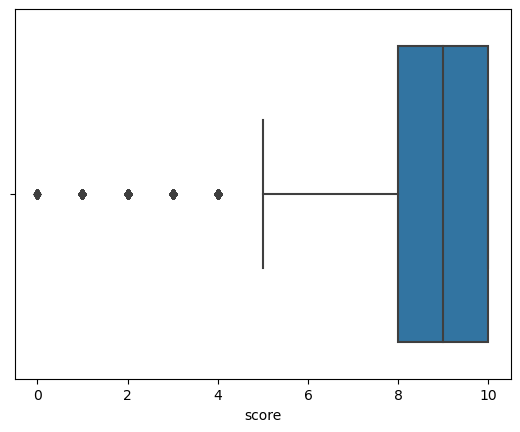

In [20]:
# Visualize the data distribution.
sns.boxplot(x=df.score);

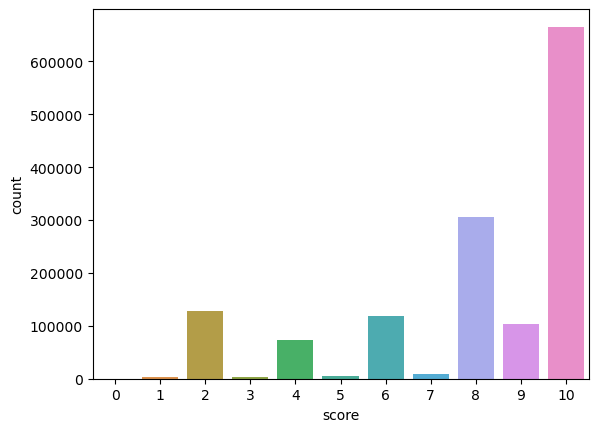

In [21]:
# Visualize the rating counts.
sns.countplot(x=df.score);

#### E. Check for duplicate values and remove them, if any.

In [22]:
df.duplicated().sum()

6436

In [23]:
df.drop_duplicates(inplace = True)

In [24]:
df.shape

(1408697, 11)

#### F. Keep only 1 Million data samples. Use random state=612.

In [25]:
df1 = df.sample(1000000, random_state=612)

In [26]:
df1.shape

(1000000, 11)

#### G. Drop irrelevant features. Keep features like Author, Product, and Score.

In [27]:
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
55265,/cellphones/lenovo-vibe-k4-note/,2/6/2016,en,in,Amazon,amazon.in,8,10.000,K900 had advance features compared to K4 note....,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)"
97318,/cellphones/htc-desire-816/,7/14/2014,en,us,Amazon,amazon.com,2,10.000,"Memory is awful, all this junk preloaded you c...",Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...
104951,/cellphones/sony-xperia-z-ultra/,11/6/2013,en,gb,Amazon,amazon.co.uk,8,10.000,I purchased the Sony Xperia Z Ultra as a repla...,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...
146543,/cellphones/lava-iris-x5/,10/28/2014,en,in,Amazon,amazon.in,2,10.000,"First android update failed, it had to be comp...",Jomine Jose,Lava Iris X5 (Black)
194697,/cellphones/sony-xperia-l/,2/7/2014,en,us,Amazon,amazon.com,8,10.000,"Came on time, everything came with it that's w...",Walter,Sony Xperia L C2104 Unlocked Phone--U.S. Warra...


In [28]:
drop_list = ["phone_url", "date", "lang", "country", "source", "domain","score_max","extract"]

In [29]:
df1.drop(drop_list, axis=1, inplace=True)

In [30]:
df1.head()

,score,author,product
55265,8,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)"
97318,2,Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...
104951,8,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...
146543,2,Jomine Jose,Lava Iris X5 (Black)
194697,8,Walter,Sony Xperia L C2104 Unlocked Phone--U.S. Warra...


### 2. Answer the following questions. 

#### A. Identify the most rated products. 

In [31]:
df1["product"].value_counts().head(10)

Lenovo Vibe K4 Note (White,16GB)       3709
Lenovo Vibe K4 Note (Black, 16GB)      3083
OnePlus 3 (Graphite, 64 GB)            2890
OnePlus 3 (Soft Gold, 64 GB)           2522
Samsung Galaxy Express I8730           1898
Huawei P8lite zwart / 16 GB            1895
Lenovo Vibe K5 (Gold, VoLTE update)    1801
Samsung Galaxy S6 zwart / 32 GB        1669
Nokia 5800 XpressMusic                 1503
Lenovo Vibe K5 (Grey, VoLTE update)    1488
Name: product, dtype: int64

#### B. Identify the users with most number of reviews.

In [32]:
df1["author"].value_counts().head(10)

Amazon Customer    54542
Cliente Amazon     13661
e-bit               5959
Client d'Amazon     5495
Amazon Kunde        3283
Anonymous           1970
einer Kundin        1890
einem Kunden        1350
unknown             1206
Anonymous           1014
Name: author, dtype: int64

#### C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. 

In [33]:
df2 = df1.copy(deep=True) # Deep copy of the original dataframe

In [34]:
R = pd.DataFrame(df2["product"].value_counts()) # Products rating value counts 

In [35]:
R1 = R[R["product"]>50] # Products that having more than 50 rating

In [36]:
Rated_Products = pd.DataFrame(R1.index) # Name of the products that having more than 50 rating

In [37]:
Rated_Products.shape

(4250, 1)

In [38]:
Rv = pd.DataFrame(df2["author"].value_counts()) # Authors value counts 

In [39]:
Rv1 = Rv[Rv["author"]>50] # Authors who have given more than  50 rating

In [40]:
Review = pd.DataFrame(Rv1.index) # Name of Authors who have given more than 50 rating

In [41]:
Review.shape

(650, 1)

In [42]:
m = df2["product"].isin(Rated_Products[0])
A = df2[m] # Dataframe that Products having more than 50 rating.

In [43]:
n = df2["author"].isin(Review[0])
B = df2[n] # Dataframe that Authors having more than 50 rating.

In [44]:
df3 = pd.merge(A,B, how="outer") # Merge the dataframe

In [45]:
df3.shape

(7178252, 3)

In [46]:
df3.drop_duplicates(inplace=True) # Remove duplicate rows.

In [47]:
df3.shape

(516553, 3)

### 3. Build a popularity based model and recommend top 5 mobile phones.

In [48]:
# Define the fuction for Popularity based 
def popularity_rec(DF):
    ratings_mean_count = pd.DataFrame(DF.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = DF.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False])
    print('Top 5 recommendations for the products are: \n')
    display(ratings_mean_count.head())
    return

In [49]:
popularity_rec(df3)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.000,140
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.000,128
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.000,122
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.000,116
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.000,114


### 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNN With Means from surprise. You can try both user-based and item-based model. 

In [50]:
! pip install numpy cython
! git clone https://github.com/NicolasHug/surprise.git
! cd surprise
! python setup.py install

Defaulting to user installation because normal site-packages is not writeable


'git' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
python: can't open file 'C:\Users\Admin\Desktop\My Python Projects\Recommended System Project\setup.py': [Errno 2] No such file or directory


In [51]:
# Import necessary libraries
from surprise import SVD, KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import accuracy

array([[<AxesSubplot: title={'center': 'score'}>]], dtype=object)

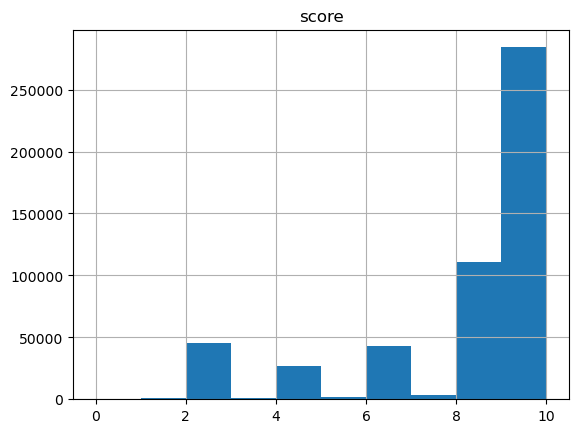

In [52]:
# Visualize the data distribution.
df3.hist()

In [53]:
df3.dropna(inplace=True) # Drop the null values

In [54]:
# If memory is an issue, we can limit the number of data points
df4 = df3.sample(n=5000, random_state=42)

In [55]:
# Define the format of the data
reader = Reader(rating_scale=(1, 10))

# Load the dataframe into the surprise dataset
data = Dataset.load_from_df(df4[['author',"product",'score']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Define the SVD model
svd = SVD(n_factors=50, random_state=42)

# Train the model on the training set
svd.fit(trainset)

# Make predictions on the test set
svd_pred = svd.test(testset)


In [56]:
# Define the user-based kNN with Means model
knn_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline'}, user_based = True)

# Train the model on the training set
knn_user.fit(trainset)

# Make predictions on the test set
knn_user_pred = knn_user.test(testset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [57]:
# Define the item-based kNN with Means model
knn_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline'}, user_based = False)

# Train the model on the training set
knn_item.fit(trainset)

# Make predictions on the test set
knn_item_pred = knn_item.test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


### 5. Evaluate the collaborative model. Print RMSE value.

In [58]:
# Compute the RMSE & MAE for SVD model
SVD_rmse = accuracy.rmse(svd_pred)
SVD_mae = accuracy.mae(svd_pred)

RMSE: 2.4444
MAE:  1.9263


In [59]:
# Compute the RMSE & MAE for KNN user based model
KNN_user_rmse = accuracy.rmse(knn_user_pred)
KNN_user_mae = accuracy.mae(knn_user_pred)

RMSE: 2.4839
MAE:  1.9310


In [60]:
# Compute the RMSE & MAE for KNN item based model
KNN_item_rmse = accuracy.rmse(knn_item_pred)
KNN_item_mae = accuracy.mae(knn_item_pred)

RMSE: 2.4839
MAE:  1.9310


<AxesSubplot: >

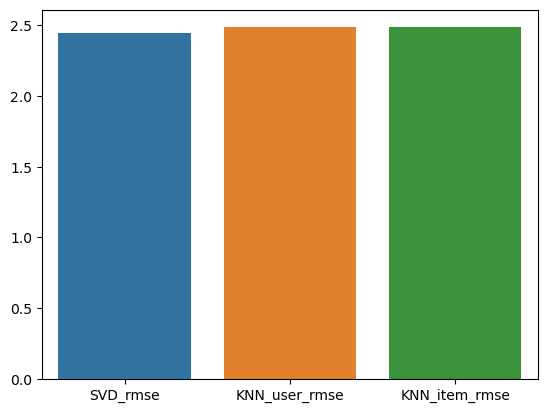

In [61]:
import seaborn as sns
# Comparison of RMSE scores from different collaorative algorithms
sns.barplot(x=['SVD_rmse','KNN_user_rmse', 'KNN_item_rmse'],y=[SVD_rmse,KNN_user_rmse, KNN_item_rmse])

### 6. Predict score (average rating) for test users. 

In [62]:
svd_pred_df=pd.DataFrame(svd_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('average rating  by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  8.065319359062459
average rating  by test users:  8.143
average prediction error for test users:  1.92626907094861


In [63]:
knn_user_pred_df=pd.DataFrame(knn_user_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_user_pred_df['est'].mean())
print('average rating  by test users: ',knn_user_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_user_pred_df['rui']-knn_user_pred_df['est']).abs().mean())

average prediction for test users:  8.085312415171936
average rating  by test users:  8.143
average prediction error for test users:  1.9309682803766572


In [64]:
knn_item_pred_df=pd.DataFrame(knn_item_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_item_pred_df['est'].mean())
print('average rating  by test users: ',knn_item_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_item_pred_df['rui']-knn_item_pred_df['est']).abs().mean())

average prediction for test users:  8.085312415171936
average rating  by test users:  8.143
average prediction error for test users:  1.9309682803766572


### 7. Report your findings and inferences.

I built the colabrative models "SVD" & "KNNwithMeans" model with used based & item based. As per the evaluation of "SVD" we got less values of RMSE & MAE scores which is comparitively lower than KNNwithMeans models. Eventhough the performance of the model to be improved.

Our predicted rating for the test users is 8.07 out of 10.

SVD is a powerful technique for collaborative filtering that can be used to make accurate recommendations even in situations where the data is sparse. The decomposition of the user-item interaction matrix into latent feature spaces can help to identify underlying patterns in the data that are not immediately apparent. By reducing the dimensionality of the data, SVD can also help to improve the computational efficiency of the model.

One of the main advantages of SVD is that it can handle missing data, which is common in real-world recommendation systems. SVD can also be used in combination with other techniques such as content-based filtering to improve the performance of the model.

However, it is important to note that SVD is a linear method, which means it can't capture non-linear relationships in the data. Also, it may not perform well when there is a lot of noise in the data. Therefore, it's important to evaluate the performance of the model and compare it to other methods to ensure that it is providing the most accurate recommendations possible.

It's also important to note that, SVD is a unsupervised method, it can be improved by adding more features or incorporating more data. It can also be improved by using a different method such as deep learning-based methods.

In summary, SVD is a powerful technique for collaborative filtering that can handle missing data, handle sparsity and can be combined with other techniques to improve the performance of the model. However, it's important to evaluate the performance of the model, and consider the specific characteristics of the recommendation problem, the available data, and the goals of the business before using SVD as the only method.



### 8. Try and recommend top 5 products for test users.

In [65]:
from collections import defaultdict

def recommend_top_k(predictions, k=5):
    top_k = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_k[uid].append((iid, est))

    for uid, user_ratings in top_k.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_k[uid] = user_ratings[:k]

    return top_k

In [66]:
top_k_recs = recommend_top_k(svd_pred)
top_k_recs

defaultdict(list,
            {'daniele': [('Cubot X9 Smartphone 3G - 5,0 pollici IPS, Android 4.4.4 Octa core 2G RAM + 16G ROM, Dual SIM, OTG GPS WiFi Cellulare, Nero',
               8.08625)],
             'PIXIE': [('Samsung Galaxy S6 SM-G920F Factory Unlocked Cellphone, International Version, No Warranty 32GB, Gold',
               8.073319031409792)],
             'Amazon Customer': [('LG Electronics Nexus 5X H791 32GB Carbon Black, Factory Unlocked EU GSM Smartphone, International Model, No Warranty',
               6.897546259884673),
              ('Asus Zenfone 3 ZE552KL-1A031IN (Black)', 6.8350195902191535),
              ('BlackBerry Bold 9900 Sim Free Mobile Phone-Black',
               6.821716490020162),
              ('Sony Xperia M (Single SIM, White)', 6.731581654644765),
              ('LG Electronics G2D802 UK SIM-Free Smartphone - Black (Android, 16GB)',
               6.731581654644765)],
             'Kimberly Fujioka': [('Motorola Moto E (1st Generation) - White

### 9. Try other techniques (Example: cross validation) to get better results

In [67]:
#Import Cross validate library
from surprise.model_selection import cross_validate

In [68]:
# Define the format of the data
reader = Reader(rating_scale=(1, 10))

# Load the dataframe into the surprise dataset
data = Dataset.load_from_df(df4[['author',"product",'score']], reader)

# Define the algorithm
algo = SVD()

# Define the evaluation method
kf = 5

# Evaluate the algorithm using cross-validation
SVD_result = cross_validate(algo, data, measures=['RMSE'], cv=kf)

# Print the mean of test_rmse
print("Best mean cross-validated score: {:.4f}".format(np.mean(SVD_result['test_rmse'])))

Best mean cross-validated score: 2.5108


In [69]:
# Define the format of the data
reader = Reader(rating_scale=(1, 10))

# Load the dataframe into the surprise dataset
data = Dataset.load_from_df(df4[['author',"product",'score']], reader)

# Define the algorithm
algo = KNNWithMeans(user_based = False)


# Define the evaluation method
kf = 5

# Evaluate the algorithm using cross-validation
KNN_item_result = cross_validate(algo, data, measures=['RMSE'], cv=kf)

# Print the mean of test_rmse
print("Best mean cross-validated score: {:.4f}".format(np.mean(KNN_item_result['test_rmse'])))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Best mean cross-validated score: 2.5576


In [70]:
# Define the format of the data
reader = Reader(rating_scale=(1, 10))

# Load the dataframe into the surprise dataset
data = Dataset.load_from_df(df4[['author',"product",'score']], reader)

# Define the algorithm
algo = KNNWithMeans(user_based = True)


# Define the evaluation method
kf = 5

# Evaluate the algorithm using cross-validation
KNN_user_result = cross_validate(algo, data, measures=['RMSE'], cv=kf)

# Print the mean of test_rmse
print("Best mean cross-validated score: {:.4f}".format(np.mean(KNN_user_result['test_rmse'])))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Best mean cross-validated score: 2.5555


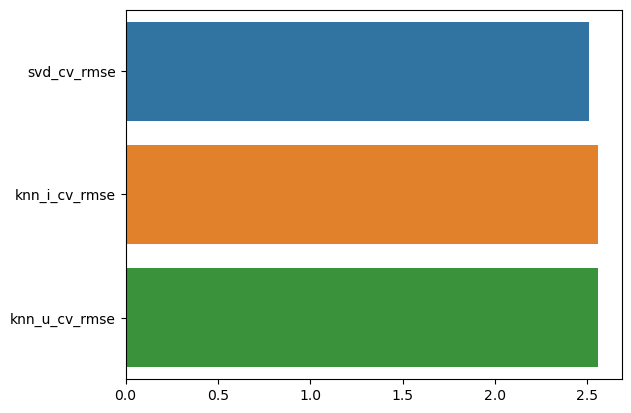

In [71]:
# Comparison of RMSE scores(mean cv) from different collaorative algorithms
sns.barplot(y=['svd_cv_rmse','knn_i_cv_rmse', 'knn_u_cv_rmse'],
            x=[SVD_result['test_rmse'].mean(),KNN_item_result['test_rmse'].mean(), KNN_user_result['test_rmse'].mean()]);

### 10. In what business scenario you should use popularity based Recommendation Systems ?

Popularity-based recommendation systems are best used in scenarios where the goal is to recommend items that are popular or well-liked among a large number of users. This is often the case in e-commerce or entertainment platforms, where the goal is to recommend products or content that are likely to be of interest to the majority of users. Popularity-based systems can also be useful in situations where there is limited information available about users or their preferences, as they do not require extensive user profiling. They can also be useful as a fallback option when more sophisticated recommendation methods are not available or are not providing useful recommendations.


Popularity-based recommendation systems are relatively simple to implement and maintain, as they do not require extensive data preprocessing or complex algorithms. They can be implemented quickly and easily, making them a good choice for businesses that need to provide recommendations quickly, or for businesses that have limited resources for building more advanced recommendation systems.

Popularity-based systems can also be useful in situations where there is a high degree of homogeneity among users, such as in a market with a small number of users that share similar interests. These systems are also useful when the recommendation algorithm should be consistent across different products and services, as it ensures the same recommendation to all users.

However, it is important to note that popularity-based systems can lead to a lack of diversity in recommendations, as they tend to recommend the same items to all users. This can result in users seeing the same items repeatedly, which can lead to decreased engagement and satisfaction. It can also lead to a lack of discovery of new items and new experiences. Thus, it is important to consider the use case and the goal of the recommendation system, before deciding to use popularity-based approach.






### 11. In what business scenario you should use CF based Recommendation Systems ? 

Collaborative Filtering (CF) based recommendation systems are best used in scenarios where the goal is to provide personalized recommendations to individual users based on their past behavior and the behavior of similar users. These systems are particularly effective when there is a large amount of data available about users and their interactions with items.

CF-based recommendation systems are often used in e-commerce, media streaming, and social media platforms, where the goal is to provide relevant and personalized recommendations to users. For example, in an e-commerce platform, CF-based systems can be used to recommend products to users based on the products they have previously viewed or purchased, as well as the products viewed or purchased by similar users. In a media streaming platform, CF-based systems can be used to recommend movies or TV shows to users based on the movies or TV shows they have previously watched, as well as the movies or TV shows watched by similar users.

CF-based recommendation systems can also be useful in situations where there is a high degree of heterogeneity among users, as they take into account individual preferences and characteristics. They are also useful in situations where there is a high degree of sparsity in the data, such as in platforms with a large number of users and items, as they can effectively handle sparse data.

Overall, CF-based recommendation systems can be useful for businesses that want to provide personalized recommendations to individual users, and have a large amount of data available about users and their interactions with items.






### 12. What other possible methods can you think of which can further improve the recommendation for different users ?

There are a variety of other methods that can be used to improve recommendations for different users, some of which include:

**1. Content-based filtering:** This method uses information about the characteristics of the items being recommended, such as their genre, author, or keywords, to recommend items that are similar to items that the user has previously liked.

**2. Hybrid methods:** This method combines multiple recommendation methods, such as CF and content-based filtering, in order to take advantage of the strengths of each method and provide more accurate recommendations.

**3. Matrix Factorization:** This method uses techniques such as Singular Value Decomposition (SVD) to factorize the user-item interaction matrix into a set of latent features, which can be used to make recommendations.

**4. Deep Learning-based methods:** This method uses neural networks to learn the underlying patterns in the data and make recommendations. These methods can be used for recommendation problem and can improve the recommendation for different users.

**5. Context-aware methods:** This method take into account the context in which the user is making a request for a recommendation, such as the time of day or the user's location, to provide more relevant recommendations.

**6. Ensemble Methods:** These methods use multiple models to make recommendations, and use a combination of the predictions from these models to make the final recommendation.

**7. Knowledge Graph based methods :** They use the knowledge graph of the items and the users to make recommendations. They can be used in recommendation problem when there is a lot of structured data available

It's important to note that the best method to use will depend on the specific characteristics of the recommendation problem, the available data, and the goals of the business.





